# About the dataset and the project

### Historical data on electricity consumption in Quebec by sector of activity

This dataset from Hydro-Quebec presents the electricity consumption of all consumption locations in Quebec by sector of activity. Updated twice a year, the data has been available since 2016, until 2022.

The consumption data is indicated by sector of activity (agricultural, residential, commercial, institutional, and industrial) or by a regional county municipality (MRC) in the province of Quebec.

Due to the sensitivity of electricity consumption data regarding privacy protection or certain business issues, it is possible that the data may not be available for certain municipalities.

Additional Information
- Update Frequency: Semi-annual
- Temporal Coverage: Monthly
- Notices and Terms of Use: The provided data is raw, without a guarantee of quality, and may change without notice.

### Analysis of electricity consumption profile in Quebec

The project aims to clean, preprocess, transform, analyze, and visualize various scenarios of electricity consumption in Quebec. It utilized libraries such as pandas, numpy, matplotlib, sklearn, and seaborn. The level of tool application is beginner. Any contribution for improvement will be welcome.

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Importing the Dataset

In [3]:
consummation_electricite = r'C:\Users\Jairo\OneDrive\Documentos\Data\CodeAcademy_Data_Science\Python\10_minutes_to_pandas\2022-10_Historique-consommation-electricite-par-secteur-activite_municipalite.xlsx'

In [4]:
ce= pd.read_excel(consummation_electricite)

### Cleaning the data

In [5]:
ce.head(5)

,REGION_ADM_QC_TXT,MRC_TXT,NOM_MUNICIPALITE,ANNEE_MOIS,SECTEUR,Total (kWh)
0,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,AGRICOLE,192890.0
1,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,COMMERCIAL,15363686.0
2,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,INDUSTRIEL,68795794.7
3,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,INSTITUTIONNEL,5264076.0
4,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,RÉSIDENTIEL,51407699.0


In [6]:
# # Separating the year and month information contained in the column "Annee_mois" into two columns, "ANNEE" and "MOIS".
ce[['ANNEE', 'MOIS']] = ce['ANNEE_MOIS'].str.split('-', expand=True)

In [7]:
ce.head(5)

,REGION_ADM_QC_TXT,MRC_TXT,NOM_MUNICIPALITE,ANNEE_MOIS,SECTEUR,Total (kWh),ANNEE,MOIS
0,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,AGRICOLE,192890.0,2016,01
1,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,COMMERCIAL,15363686.0,2016,01
2,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,INDUSTRIEL,68795794.7,2016,01
3,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,INSTITUTIONNEL,5264076.0,2016,01
4,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,2016-01,RÉSIDENTIEL,51407699.0,2016,01


In [8]:
# Deleting the "ANNEE_MOIS" column, as we have completed the data split.
ce.drop('ANNEE_MOIS', axis=1, inplace=True)

In [9]:
ce.head(5)

,REGION_ADM_QC_TXT,MRC_TXT,NOM_MUNICIPALITE,SECTEUR,Total (kWh),ANNEE,MOIS
0,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,AGRICOLE,192890.0,2016,01
1,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,COMMERCIAL,15363686.0,2016,01
2,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,INDUSTRIEL,68795794.7,2016,01
3,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,INSTITUTIONNEL,5264076.0,2016,01
4,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,RÉSIDENTIEL,51407699.0,2016,01


In [10]:
# Checking the number of null values.
nulls=ce.isna().sum()
nulls

REGION_ADM_QC_TXT         0
MRC_TXT               27102
NOM_MUNICIPALITE          0
SECTEUR                   0
Total (kWh)          299518
ANNEE                     0
MOIS                      0
dtype: int64

In [11]:
ce.head(5)

,REGION_ADM_QC_TXT,MRC_TXT,NOM_MUNICIPALITE,SECTEUR,Total (kWh),ANNEE,MOIS
0,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,AGRICOLE,192890.0,2016,01
1,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,COMMERCIAL,15363686.0,2016,01
2,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,INDUSTRIEL,68795794.7,2016,01
3,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,INSTITUTIONNEL,5264076.0,2016,01
4,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,RÉSIDENTIEL,51407699.0,2016,01


In [12]:
# Deleting the rows in the 'Total kWh' column that are empty.
ce.dropna(subset=['Total (kWh)'], inplace=True)
nulls=ce.isna().sum()
nulls

REGION_ADM_QC_TXT       0
MRC_TXT              8859
NOM_MUNICIPALITE        0
SECTEUR                 0
Total (kWh)             0
ANNEE                   0
MOIS                    0
dtype: int64

In [13]:
# Making some adjustments to the title and text in order to organize the table.
ce.columns = ce.columns.str.upper()
ce['SECTEUR'] = ce['SECTEUR'].str.lower()
ce['SECTEUR'] = ce['SECTEUR'].str.title()
ce.head(5)

,REGION_ADM_QC_TXT,MRC_TXT,NOM_MUNICIPALITE,SECTEUR,TOTAL (KWH),ANNEE,MOIS
0,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,Agricole,192890.0,2016,01
1,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,Commercial,15363686.0,2016,01
2,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,Industriel,68795794.7,2016,01
3,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,Institutionnel,5264076.0,2016,01
4,Abitibi-Témiscamingue,NaN,Rouyn-Noranda,Résidentiel,51407699.0,2016,01


In [15]:
# Breaking Down the analysis to understand why the values in 2022 are so low
ce['DATE'] = pd.to_datetime(ce['ANNEE'].astype(str) + '-' + ce['MOIS'].astype(str), format='%Y-%m')
linhas_preenchidas_por_ano = ce.groupby(ce['DATE'].dt.year)['TOTAL (KWH)'].count()
linhas_preenchidas_por_ano

DATE
2016    19824
2017    19571
2018    19749
2019    19466
2020    19121
2021    18733
2022    14474
Name: TOTAL (KWH), dtype: int64

In [16]:
ce_2022 = ce[ce['DATE'].dt.year == 2022]
linhas_preenchidas_por_mes_2022 = ce_2022.groupby(ce_2022['DATE'].dt.month)['TOTAL (KWH)'].count()
linhas_preenchidas_por_mes_2022

DATE
1    1656
2    1620
3    1596
4    1529
5    1506
6    1519
7    1702
8    1683
9    1663
Name: TOTAL (KWH), dtype: int64

In the year 2022, data was collected only until September. Considering this aspect, all information gathered in this year can be regarded as outliers and will not be considered in the analysis.

### Analyzing and visualizing

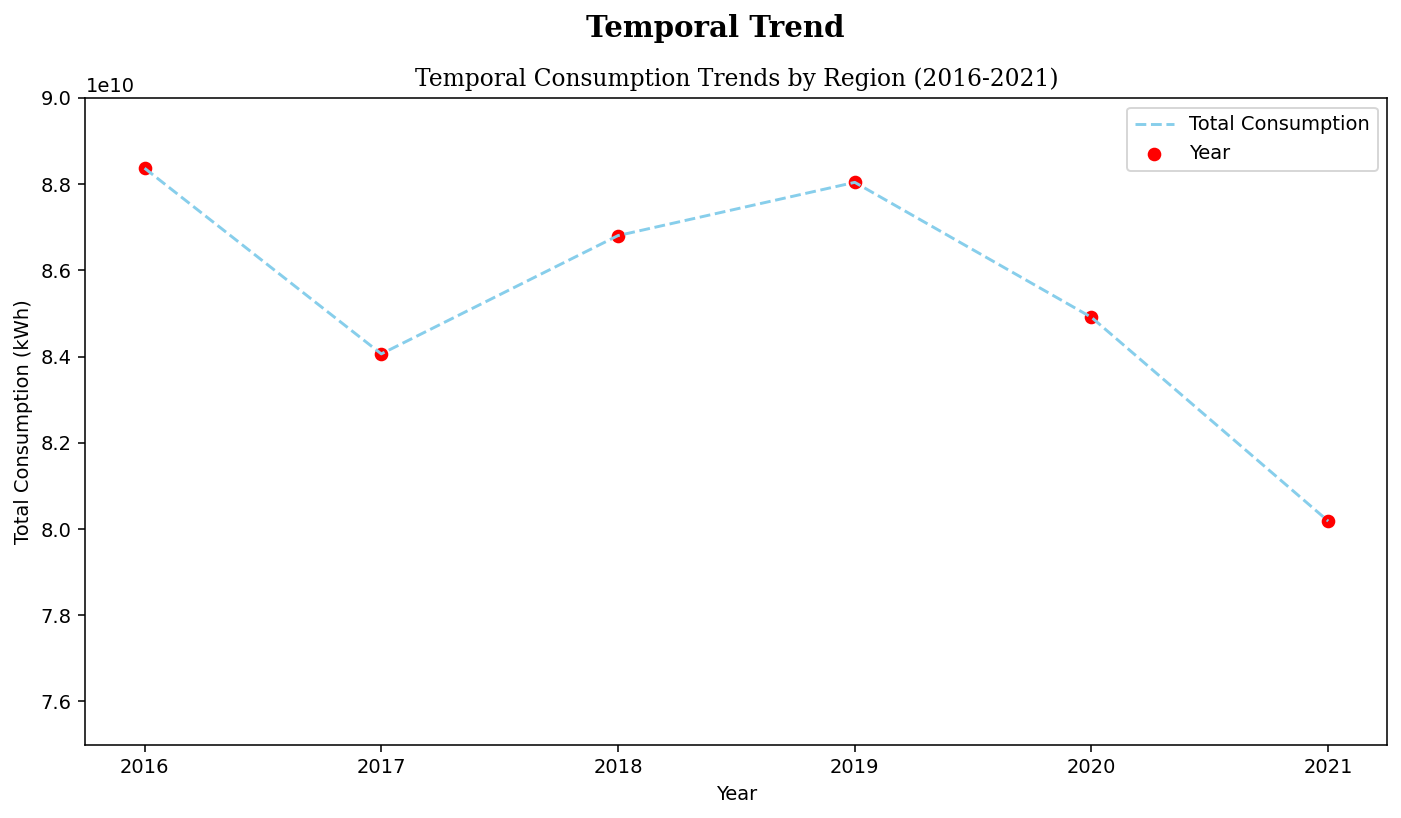

In [109]:
# Creating trend consumption graph over the years (with the year 2022 excluded)
ce_f = ce[ce['ANNEE'] != '2022']
ce_f['DATE'] = pd.to_datetime(ce_f['ANNEE'].astype(str) + '-' + ce_f['MOIS'].astype(str), format='%Y-%m')
temporal_trends = ce_f.groupby(ce_f['DATE'].dt.year)['TOTAL (KWH)'].sum()

fig, ax = plt.subplots(figsize=(12, 6))

temporal_trends.plot(label='Total Consumption', linestyle='--', color='skyblue')
ax.scatter(temporal_trends.index, temporal_trends, color='red', marker='o', label='Year')

fig.suptitle('Temporal Trend', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_title('Temporal Consumption Trends by Region (2016-2021)', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_xlabel('Year')
ax.set_ylabel('Total Consumption (kWh)')
ax.set_ylim(75000000000, 90000000000) 
ax.legend()
plt.show()




In the graph above, it is crucial to conduct a crosscheck for the years 2019, 2020, and 2021, examining the correlation between the fluctuations in electricity usage and the impact of the COVID-19 pandemic.

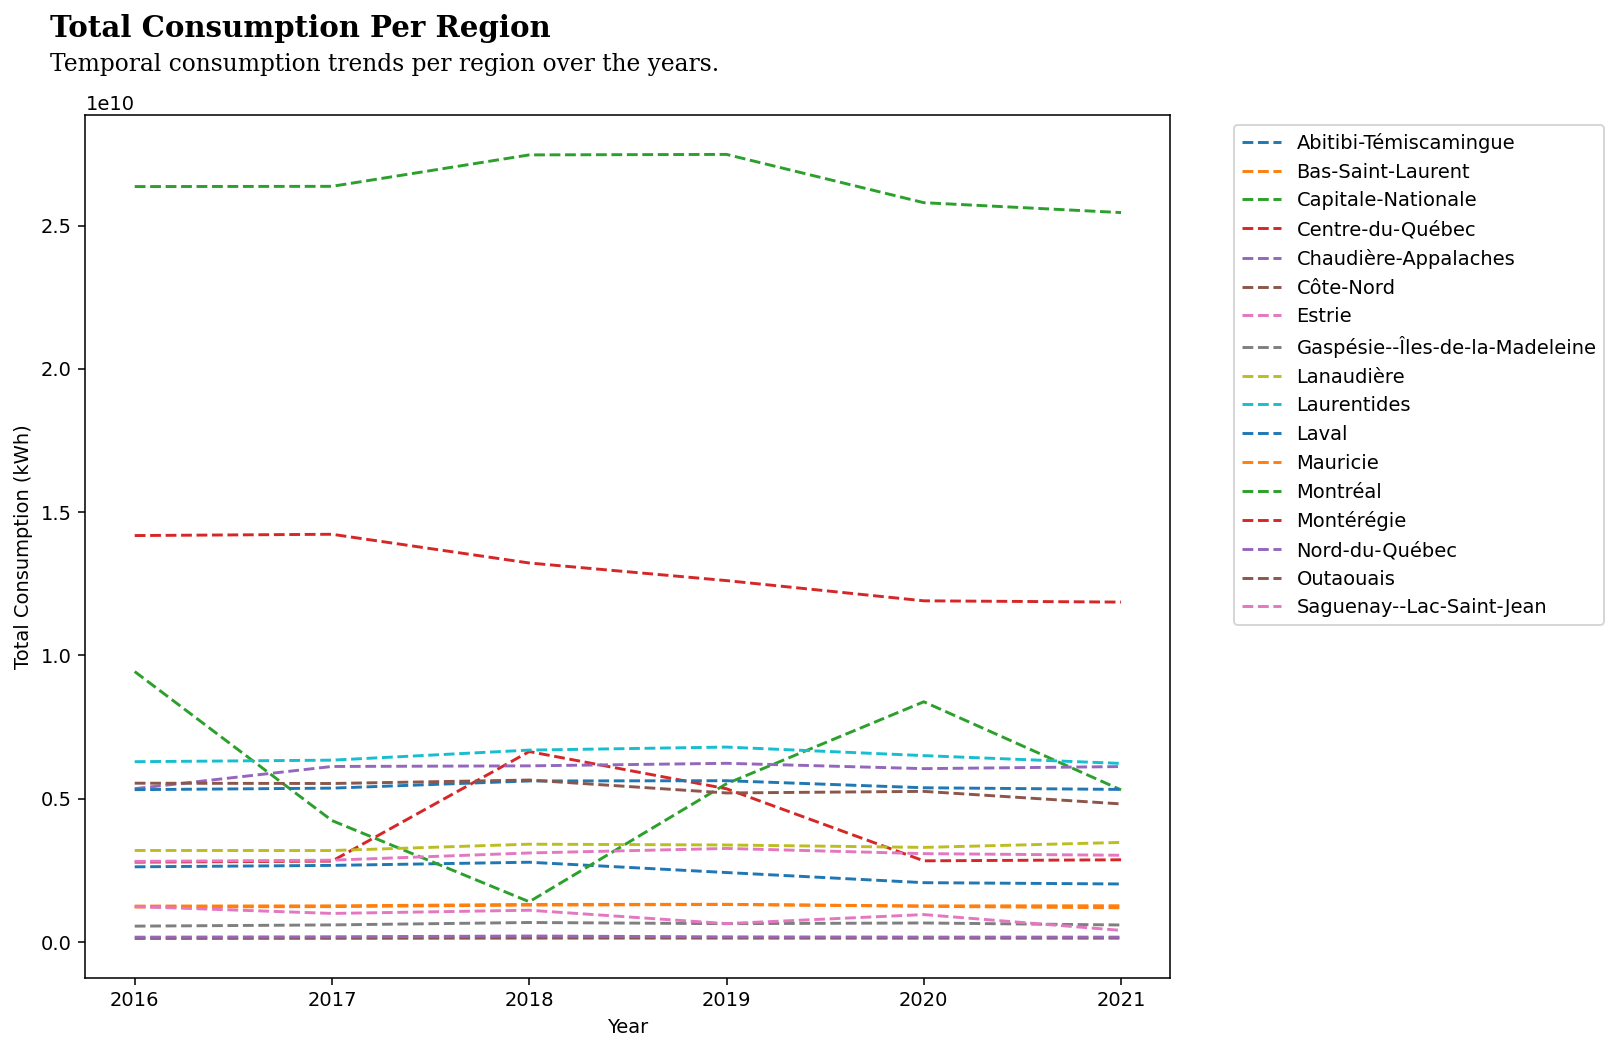

In [110]:
# Grouping data by region and year, summing total electricity consumption
tend_temp_region = ce_f.groupby(['REGION_ADM_QC_TXT', ce_f['DATE'].dt.year])['TOTAL (KWH)'].sum().unstack('REGION_ADM_QC_TXT')

fig, ax = plt.subplots(figsize=(10, 8))

for region in tend_temp_region.columns:
    ax.plot(tend_temp_region.index, tend_temp_region[region], label=region, linestyle='--')

fig.text(0.1, 0.95, 'Total Consumption Per Region', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 'Temporal consumption trends per region over the years.', fontsize=12, fontweight='light', fontfamily='serif')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Year')
plt.ylabel('Total Consumption (kWh)')
plt.show()


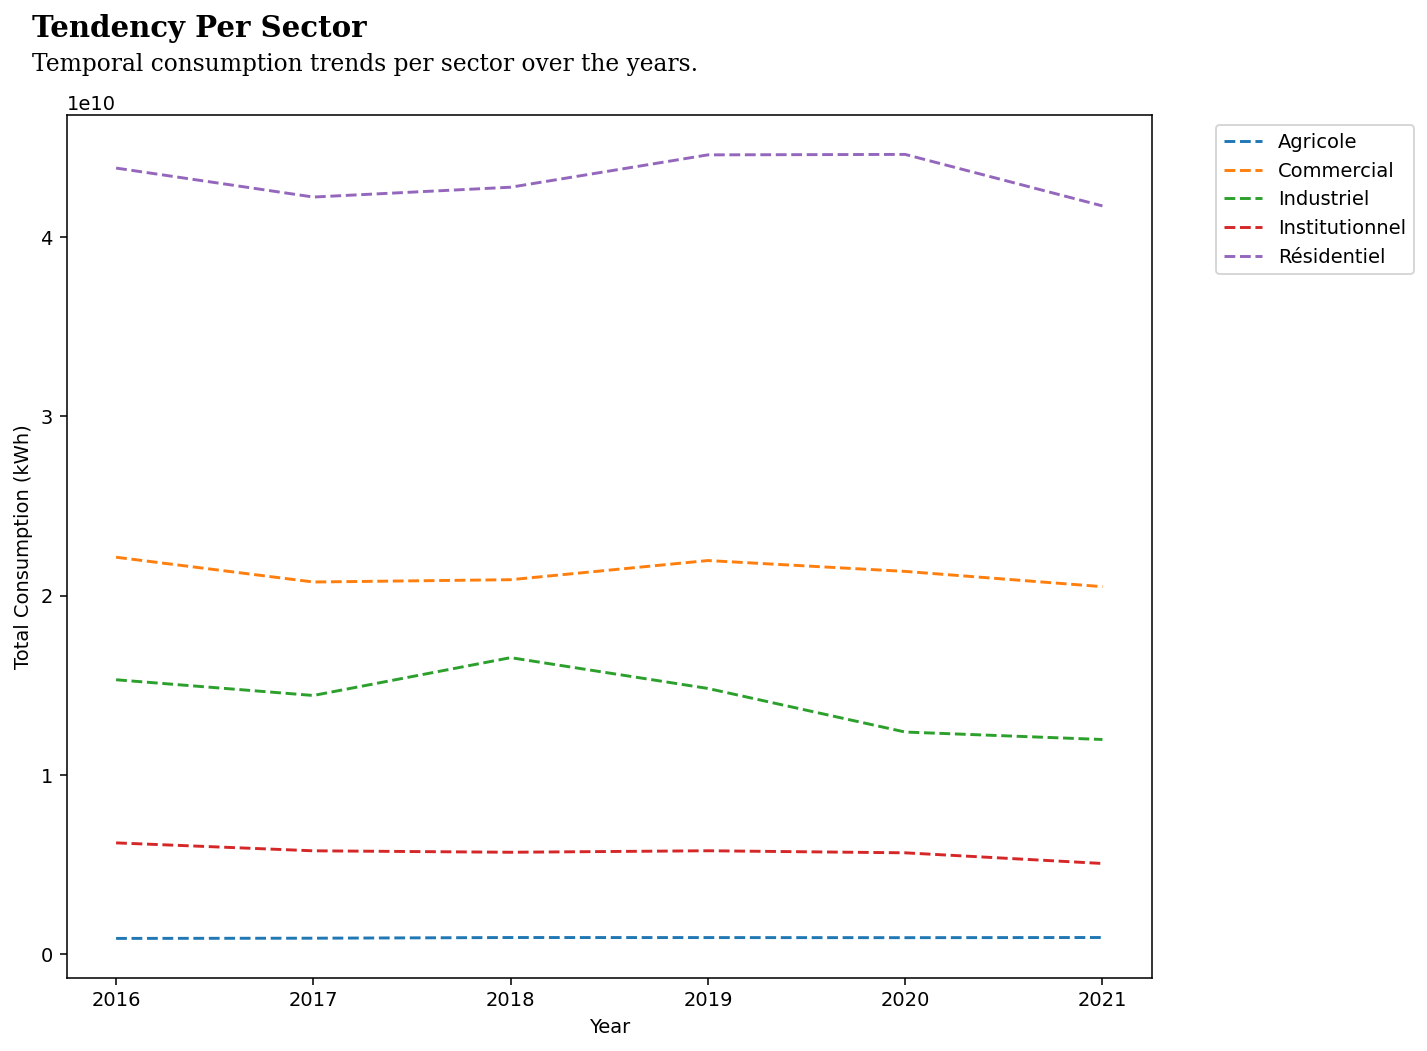

In [113]:
# Grouping data by sector and year, summing total electricity consumption
tend_temp_sector = ce_f.groupby(['SECTEUR', ce_f['DATE'].dt.year])['TOTAL (KWH)'].sum().unstack('SECTEUR')

fig, ax = plt.subplots(figsize=(10, 8))


for sector in tend_temp_sector.columns:
    ax.plot(tend_temp_sector.index, tend_temp_sector[sector], label=sector, linestyle='--')


fig.text(0.1, 0.95, 'Tendency Per Sector', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 'Temporal consumption trends per sector over the years.', fontsize=12, fontweight='light', fontfamily='serif')


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xlabel('Year')
plt.ylabel('Total Consumption (kWh)')
plt.show()


In [18]:
# Grouping the data for analysis by region, city, and sector
region_adm_an = ce_f.groupby('REGION_ADM_QC_TXT')['TOTAL (KWH)'].sum().sort_values(ascending=False)
city_an = ce_f.groupby('NOM_MUNICIPALITE')['TOTAL (KWH)'].sum().sort_values(ascending=False)
sector_an = ce_f.groupby('SECTEUR')['TOTAL (KWH)'].sum().sort_values(ascending=False)
region_adm_an
city_an
sector_an

SECTEUR
Résidentiel       2.597445e+11
Commercial        1.275701e+11
Industriel        8.544591e+10
Institutionnel    3.413133e+10
Agricole          5.473299e+09
Name: TOTAL (KWH), dtype: float64

In [19]:
region_adm_an

REGION_ADM_QC_TXT
Montréal                          1.589252e+11
Montérégie                        7.799293e+10
Laurentides                       3.884165e+10
Chaudière-Appalaches              3.599845e+10
Capitale-Nationale                3.426040e+10
Laval                             3.260815e+10
Outaouais                         3.196941e+10
Centre-du-Québec                  2.327045e+10
Lanaudière                        1.992850e+10
Estrie                            1.811657e+10
Abitibi-Témiscamingue             1.456548e+10
Bas-Saint-Laurent                 7.542817e+09
Mauricie                          7.540306e+09
Saguenay--Lac-Saint-Jean          5.310630e+09
Gaspésie--Îles-de-la-Madeleine    3.692079e+09
Nord-du-Québec                    1.042525e+09
Côte-Nord                         7.596412e+08
Name: TOTAL (KWH), dtype: float64

In [20]:
city_an

NOM_MUNICIPALITE
Montréal                  1.518808e+11
Laval                     3.260815e+10
Gatineau                  3.013212e+10
Québec                    2.621588e+10
Longueuil                 1.766525e+10
                              ...     
Saint-Rémi-de-Tingwick    5.149190e+05
Saint-Robert-Bellarmin    3.160680e+05
La Trinité-des-Monts      2.982740e+05
Notre-Dame-de-Lorette     2.061430e+05
L'Île-Dorval              1.063800e+04
Name: TOTAL (KWH), Length: 467, dtype: float64

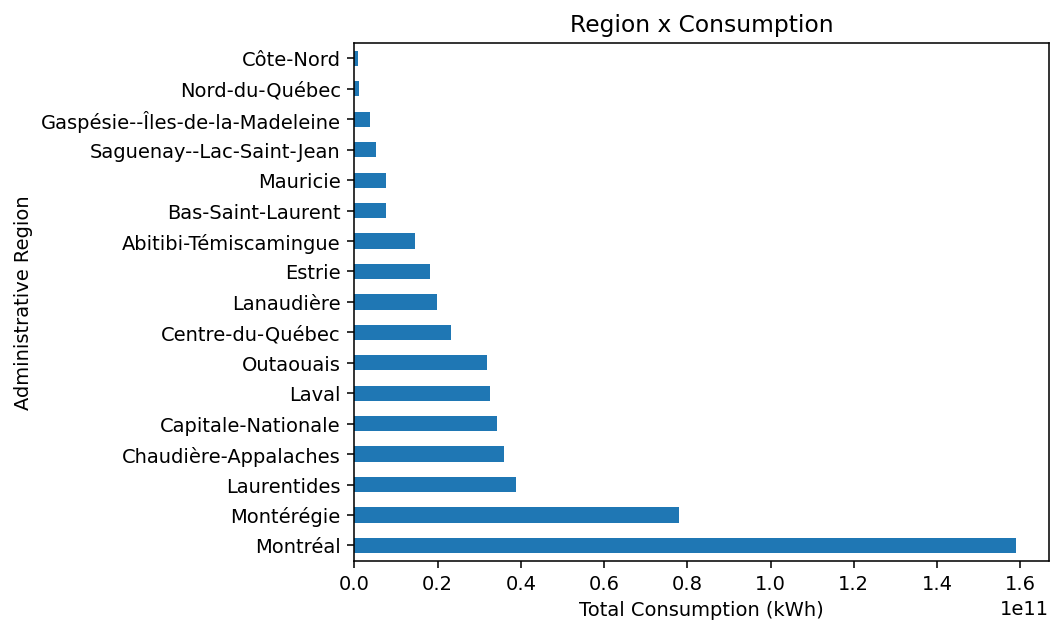

In [21]:
region_adm_an.plot(kind='barh')
plt.title('Region x Consumption')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Administrative Region')
plt.show()

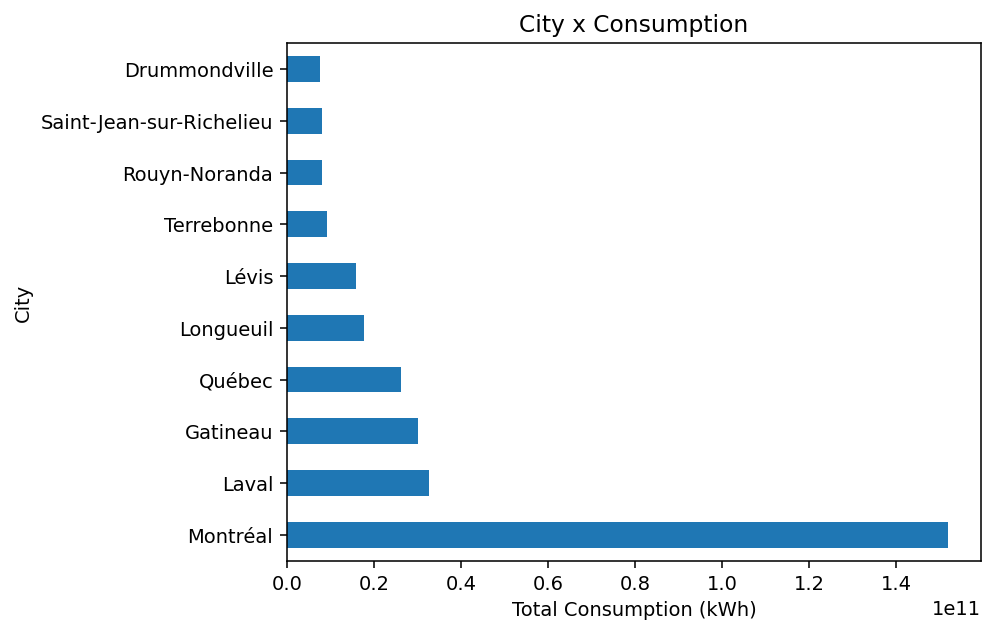

In [22]:
city_an_10 = city_an.head(10)
city_an_10.plot(kind='barh')
plt.title('City x Consumption')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('City')
plt.show()

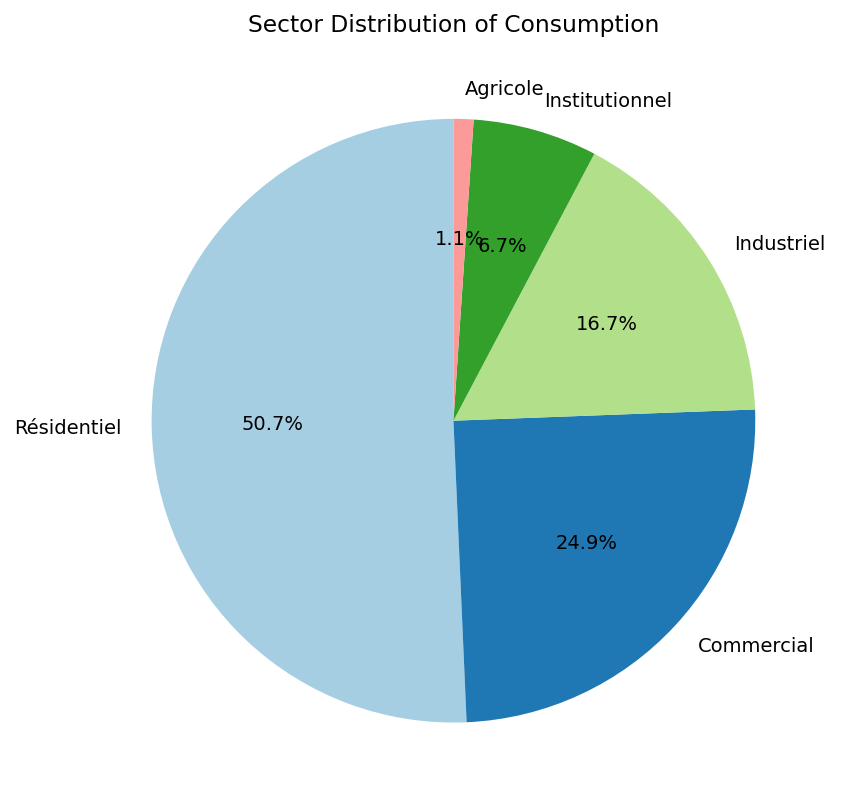

In [34]:
plt.figure(figsize=(7, 7)) 
sector_an.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Sector Distribution of Consumption')
plt.ylabel('')  
plt.show()

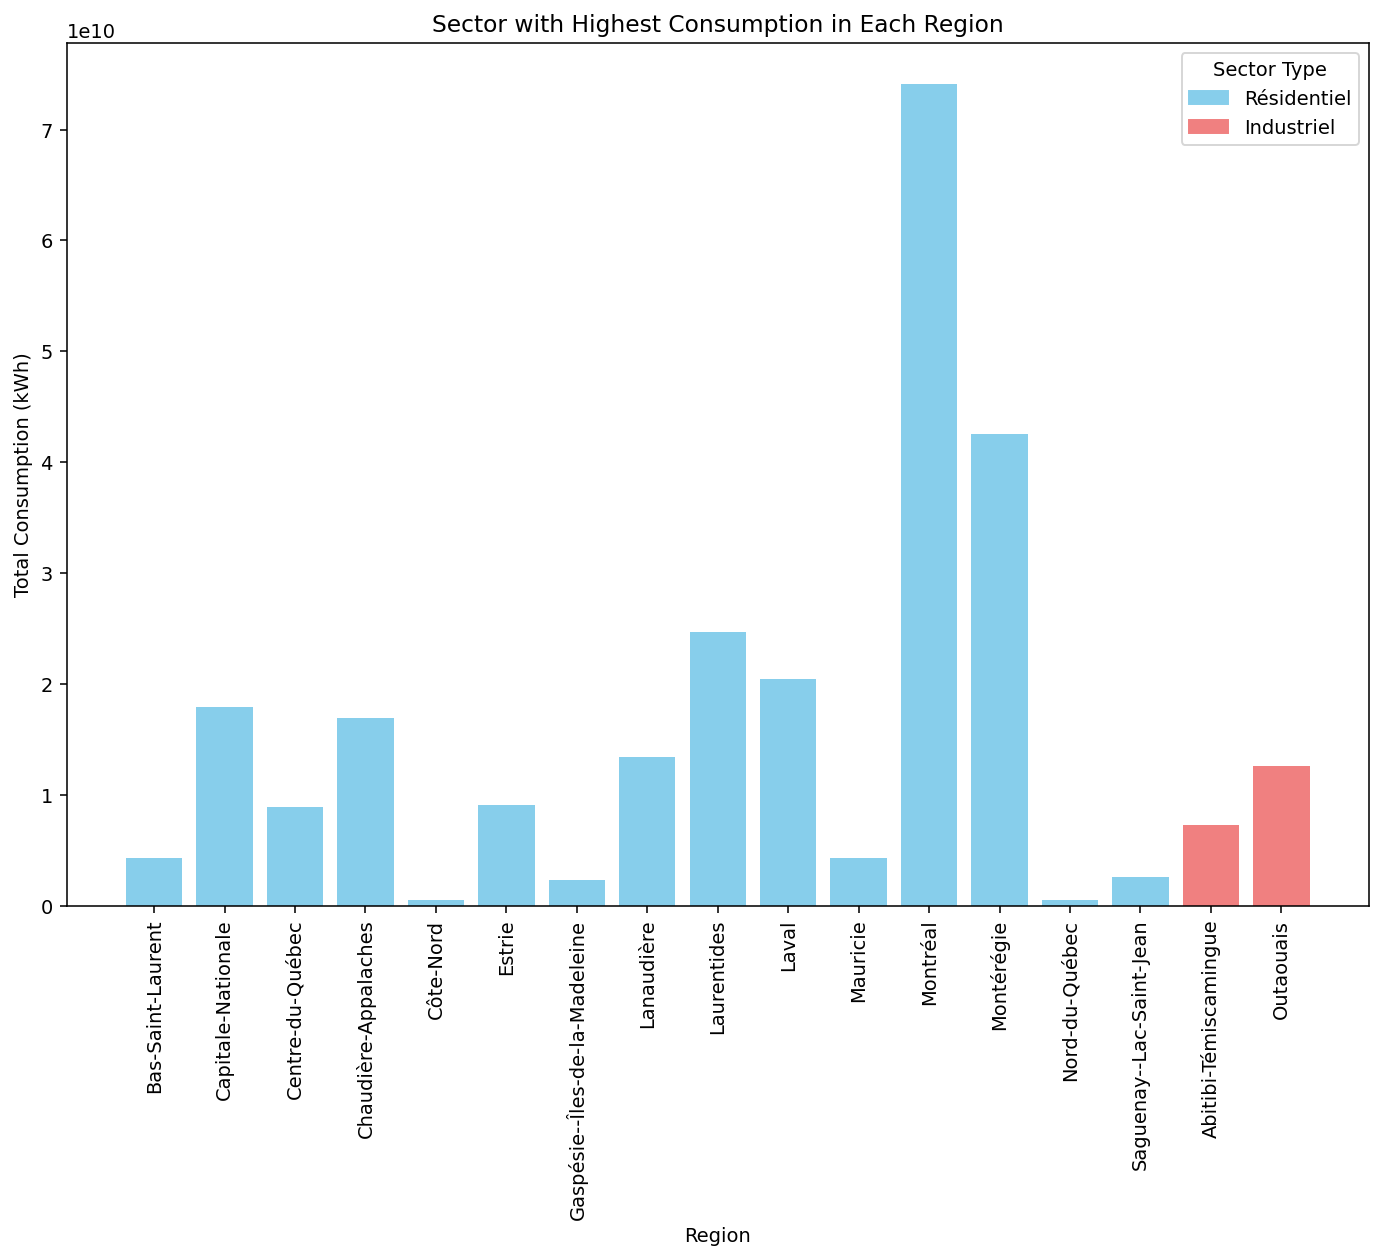

In [115]:
# Group by region and sector, to plot a graph that shows the highest sector consumption per region
consumption_by_region_sector = ce_f.groupby(['REGION_ADM_QC_TXT', 'SECTEUR'])['TOTAL (KWH)'].sum().reset_index()

sector_highest_consumption_by_region = consumption_by_region_sector.loc[consumption_by_region_sector.groupby('REGION_ADM_QC_TXT')['TOTAL (KWH)'].idxmax()]

plt.figure(figsize=(12, 8))

sector_colors = {'Résidentiel': 'skyblue', 'Industriel': 'lightcoral'}

for sector in sector_colors.keys():
    subset = sector_highest_consumption_by_region[sector_highest_consumption_by_region['SECTEUR'] == sector]
    color = sector_colors[sector]
    
    plt.bar(subset['REGION_ADM_QC_TXT'], subset['TOTAL (KWH)'], label=f'{sector} ({subset["TOTAL (KWH)"].sum():.2f} kWh)', color=color)

plt.title('Sector with Highest Consumption in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Consumption (kWh)')

handles = [plt.Rectangle((0, 0), 1, 1, color=sector_colors[label]) for label in sector_colors.keys()]
plt.legend(handles, sector_colors.keys(), title="Sector Type")

plt.xticks(rotation=90)

plt.show()


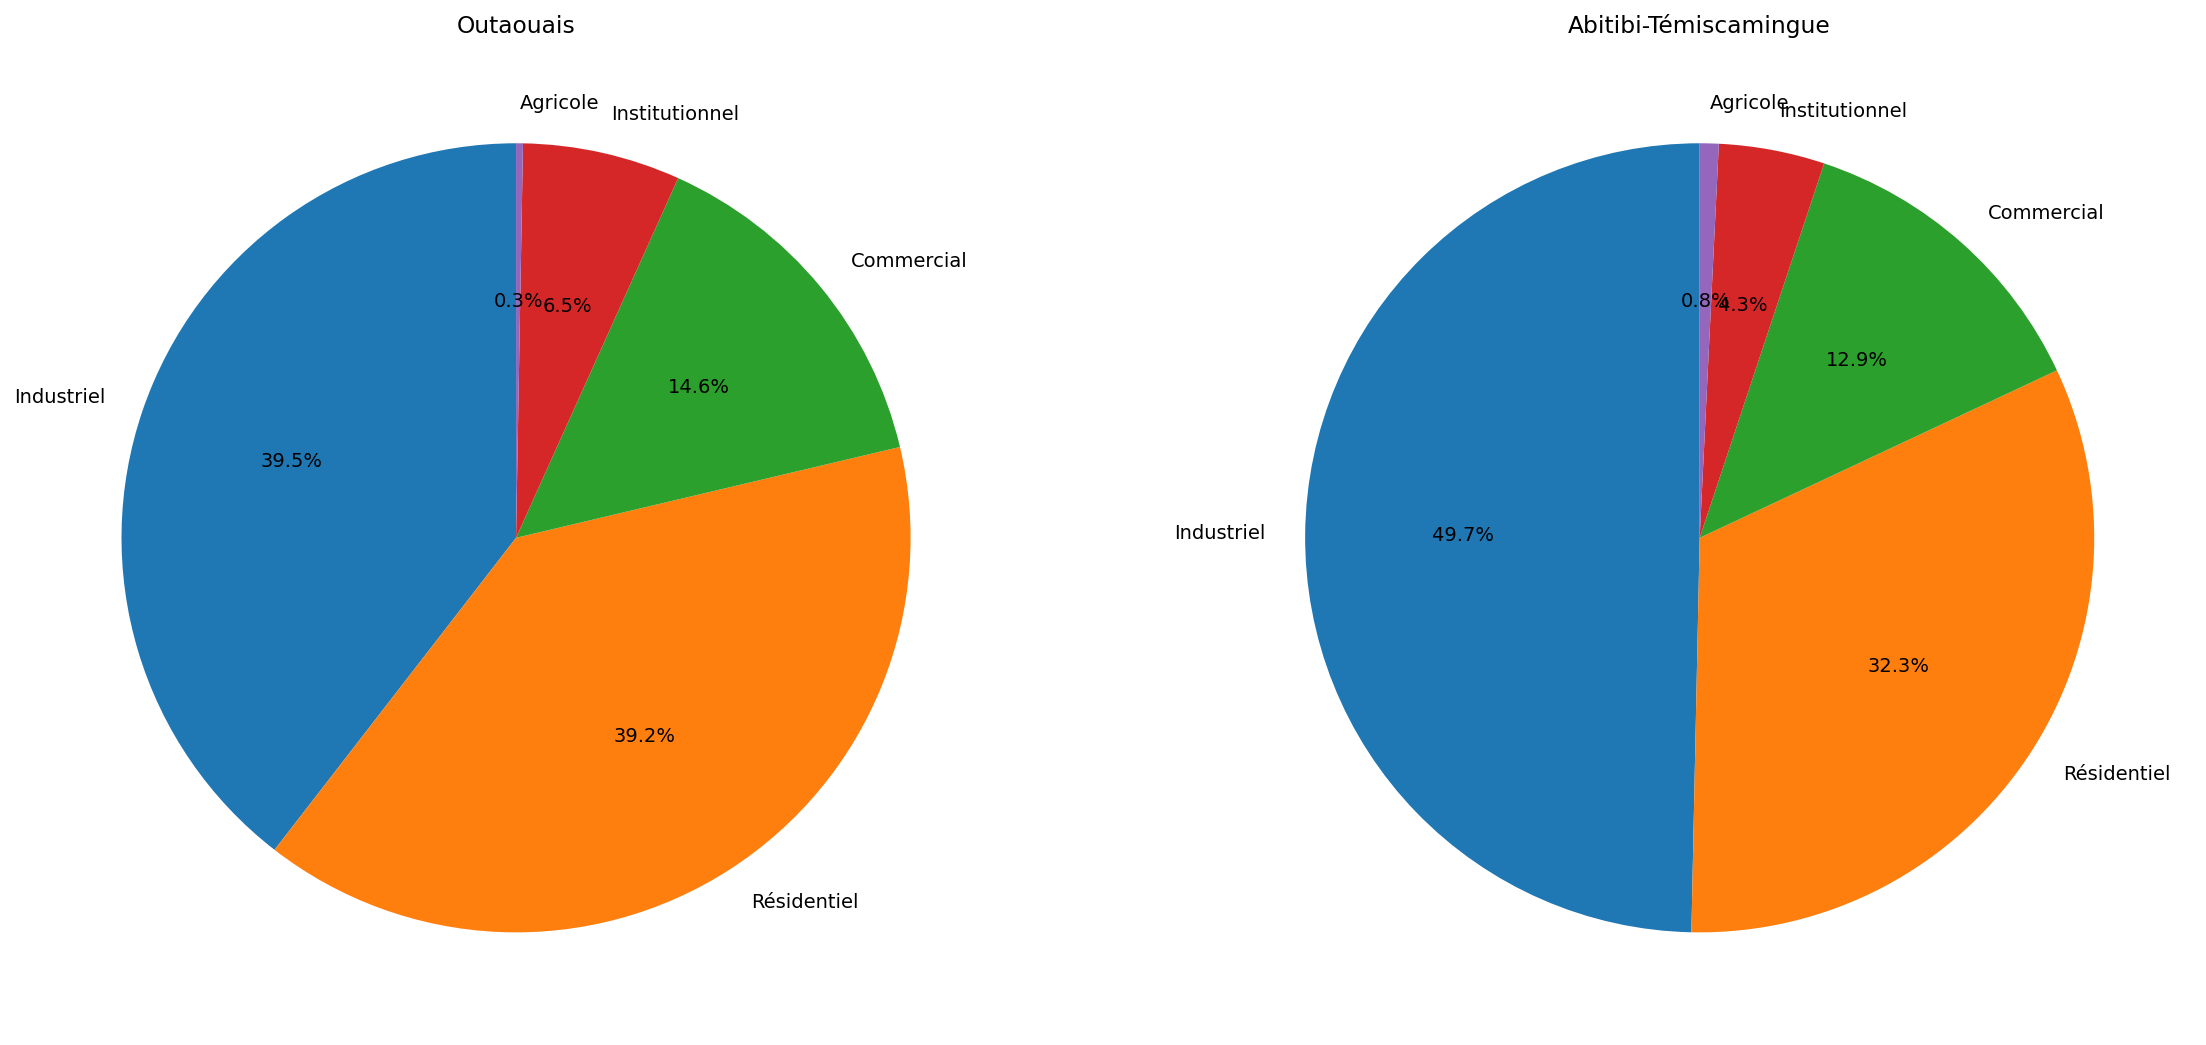

In [61]:
# Breaking down to understand the scenario in Outaouais and Abitibi-Témiscamingue
outaouais_an = ce_f[ce_f['REGION_ADM_QC_TXT'] == 'Outaouais'].groupby(['REGION_ADM_QC_TXT', 'SECTEUR'])['TOTAL (KWH)'].sum().sort_values(ascending=False)
abitibi_an = ce_f[ce_f['REGION_ADM_QC_TXT'] == 'Abitibi-Témiscamingue'].groupby(['REGION_ADM_QC_TXT', 'SECTEUR'])['TOTAL (KWH)'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].pie(outaouais_an, labels=outaouais_an.index.get_level_values(1), autopct='%1.1f%%', startangle=90)
axs[0].set_title('Outaouais')

axs[1].pie(abitibi_an, labels=abitibi_an.index.get_level_values(1), autopct='%1.1f%%', startangle=90)
axs[1].set_title('Abitibi-Témiscamingue')

plt.show()

### Prediction using linear regression

In [86]:
# Choice of Dependent and Independent Variables
X = ce_f[['ANNE']]  # Independent variables
y = ce_f['TOTAL (KWH)']  # Dependent variable

# Splitting into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction for the Next Two Years
# Creating a dataset for the next two years
next_two_years = pd.DataFrame({'ANNEE': [2023, 2024]})

# Making predictions
predicted_consumption = model.predict(next_two_years)

# Printing the predictions
print('Predictions for the next two years:')
for year, consumption in zip(next_two_years['ANNEE'], predicted_consumption):
    print(f'Year {year}: {consumption:.2f} kWh')


Mean Squared Error: 1342876373809064.2
Predições para os próximos dois anos:
Ano 2023: 4404821.56 kWh
Ano 2024: 4402964.49 kWh


In [79]:
# Comparing mean and MSE
mean_consumption = y_train.mean()
print(f'Mean Consumption: {mean_consumption}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Média do Consumo: 4413233.160080969
Mean Squared Error: 1342876373809064.2


In [104]:
# Analyzing R2
print("# Calculating the R squared value")
r2 = r2_score(y_test, y_pred)
r2

# Calculating the R squared value


0.4979488945640915

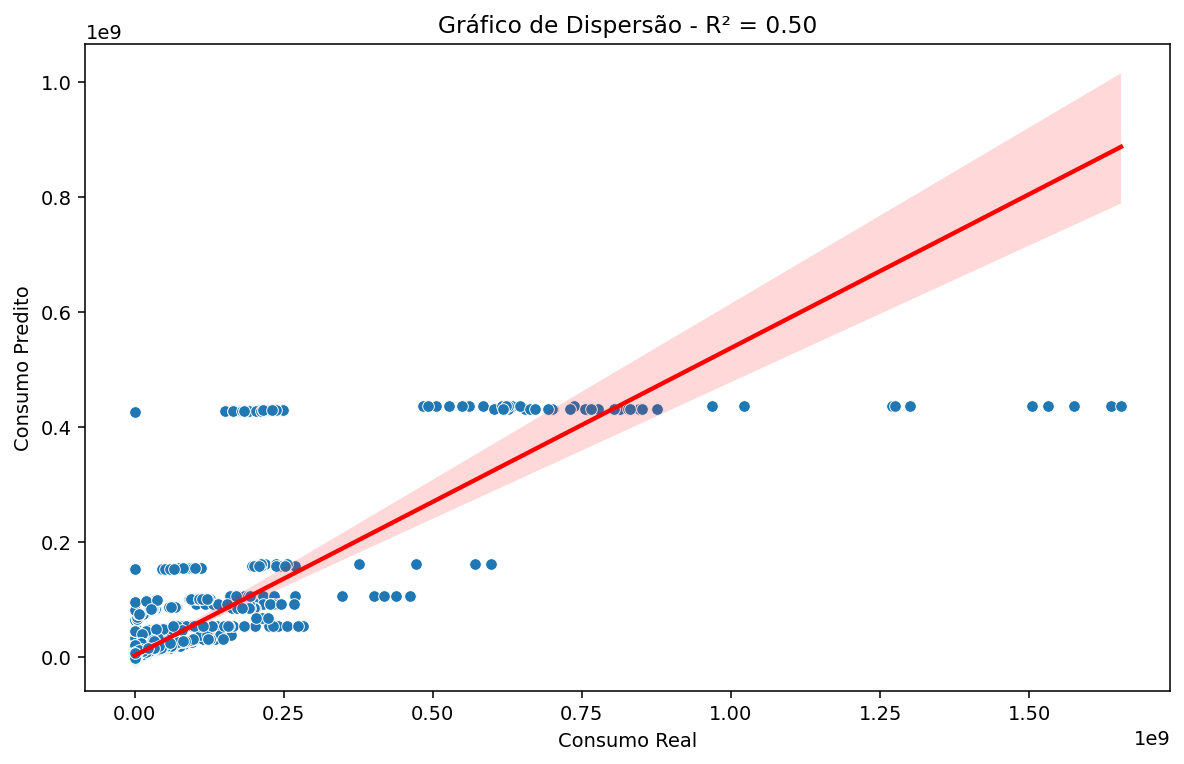

In [105]:
results = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predito', data=results)
sns.regplot(x='Real', y='Predito', data=results, scatter=False, color='red', line_kws={'label': f'R² = {r2:.2f}'})
plt.title(f'Gráfico de Dispersão - R² = {r2:.2f}')
plt.xlabel('Consumo Real')
plt.ylabel('Consumo Predito')
plt.show()

In [88]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

6804354.454718189


Analyzing Mean Squared Error (MSE): MSE is a metric that assesses the quality of predictions in terms of the mean squared error. According to the results, the MSE is quite high, indicating that the model predictions are significantly distant from the actual values.

Analyzing Mean Absolute Error (MAE): MAE is another metric for mean error, but it considers the absolute difference between predictions and actual values. In this case MAE is also high, indicating a substantial discrepancy between predictions and actual values.

Analyzing R-squared Value: R² is a metric that provides a measure of the variation explained by the model. An R² close to 1 indicates a good fit. In this case, the R² is close to zero, suggesting that the model is not effectively explaining the variation in the data.

The linear regression model shows poor performance, indicated by high Mean Squared Error (MSE), Mean Absolute Error (MAE), and a low R-squared value. Possible causes include the model's assumption of a linear relationship, missing influential features, outliers, and the inability to capture complex patterns. Potential improvements involve trying polynomial regression, incorporating additional features, handling outliers, exploring advanced models, applying regularization, using cross-validation, ensuring feature scaling, and conducting thorough data exploration. The effectiveness of these improvements depends on data characteristics and the underlying factors influencing energy consumption. It requires an iterative process of experimentation and refinement for better model performance.